# House price analysis

Goal of the project is to predict house pirces

source data: https://www.kaggle.com/datasets/joebeachcapital/house-prices-2001-2020/data

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Reading the dataset as a dataframe

In [5]:
df = pd.read_csv(r'../data/input/Real_Estate_Sales_2001-2020_GL.csv')
df.head()

/tmp/ipykernel_4465/2799051608.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'../data/input/Real_Estate_Sales_2001-2020_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


## Discovering the dataset

In [6]:
print("dataset size: ", df.size)

print("number of rows: ", len(df))

print("number of features: ", len(df.columns)) 

dataset size:  13960982
number of rows:  997213
number of features:  14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


In [8]:
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06


From the above information we can see that there are quite high deviations in the estimated value, sales value and sales ratio in the set. We will need to look at these values ​​later

In [9]:
df['Property Type'].unique()

array(['Residential', 'Commercial', 'Vacant Land', 'Public Utility',
       'Apartments', nan, 'Industrial', 'Condo', 'Two Family',
       'Single Family', 'Three Family', 'Four Family'], dtype=object)

In [10]:
df['Residential Type'].unique()

array(['Single Family', 'Three Family', nan, 'Two Family', 'Condo',
       'Four Family'], dtype=object)

In [11]:
len(df['Town'].unique())

170

In [12]:
df['Town'].unique()

array(['Ansonia', 'Avon', 'Barkhamsted', 'Beacon Falls', 'Berlin',
       'Bethel', 'Bethlehem', 'Bolton', 'Branford', 'Bristol',
       'Brookfield', 'Burlington', 'Canton', 'Cheshire', 'Colchester',
       'Coventry', 'Cromwell', 'Danbury', 'Darien', 'Derby',
       'East Granby', 'East Haddam', 'East Hartford', 'East Haven',
       'East Lyme', 'Easton', 'East Windsor', 'Enfield', 'Essex',
       'Farmington', 'Franklin', 'Glastonbury', 'Goshen', 'Granby',
       'Greenwich', 'Griswold', 'Groton', 'Guilford', 'Hartford',
       'Harwinton', 'Killingly', 'Killingworth', 'Lebanon', 'Lisbon',
       'Litchfield', 'Madison', 'Manchester', 'Mansfield', 'Meriden',
       'Middlebury', 'Middletown', 'Milford', 'Monroe', 'Montville',
       'Naugatuck', 'New Britain', 'New Canaan', 'New Fairfield',
       'New Haven', 'New London', 'Newtown', 'North Canaan',
       'North Haven', 'Norwalk', 'Norwich', 'Old Lyme', 'Old Saybrook',
       'Orange', 'Plainfield', 'Plainville', 'Plymouth', 'Port

We can see there is quite a lot of towns, we will need handle them later

## Looking for duplicates

In [13]:
duplicate_rows = df[df.duplicated(keep='first')]
duplicate_rows

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location


In [15]:
duplicate_rows.shape

(0, 14)

There are no duplicates, so there is no need to deal with them

## Looking for outliers
Outliers are values that confound the prediction.

**Example**:
The estimated value of a house was $100 because it was dilapidated in a bad neighborhood and was purchased for $12.000. Because of that we have sales ratio equal to 120, very low assessed value and quite low sale amount compared to the dataset. There are cases where house was saled for $5 000.000.000 while mean vale of house is $390.000. Some models can generalize this fact.

Sometimes a given feature  (e.g. being a nobel prize winner in physis) is so rare that we don't have enough observations that have it for the model to draw conclusion from it. Sometimes we can decide to combine such small subpopulations, especially if we suspect that they don't show significant differences. However in our case we can drop outliers.

<Axes: title={'center': 'Sales per year'}, xlabel='List Year'>

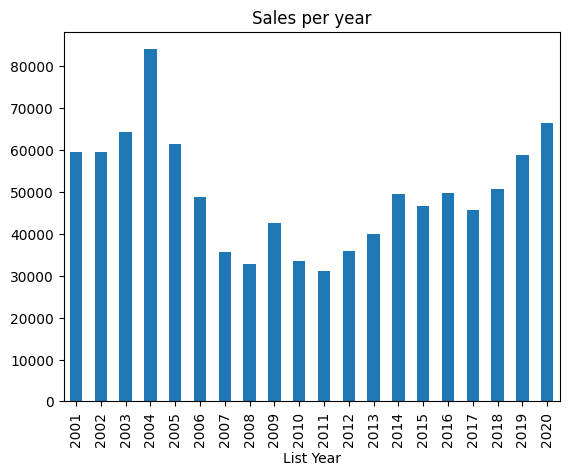

In [14]:
df['List Year'].value_counts().sort_index().plot(kind='bar',
                                            label='Year',
                                            title='Sales per year')

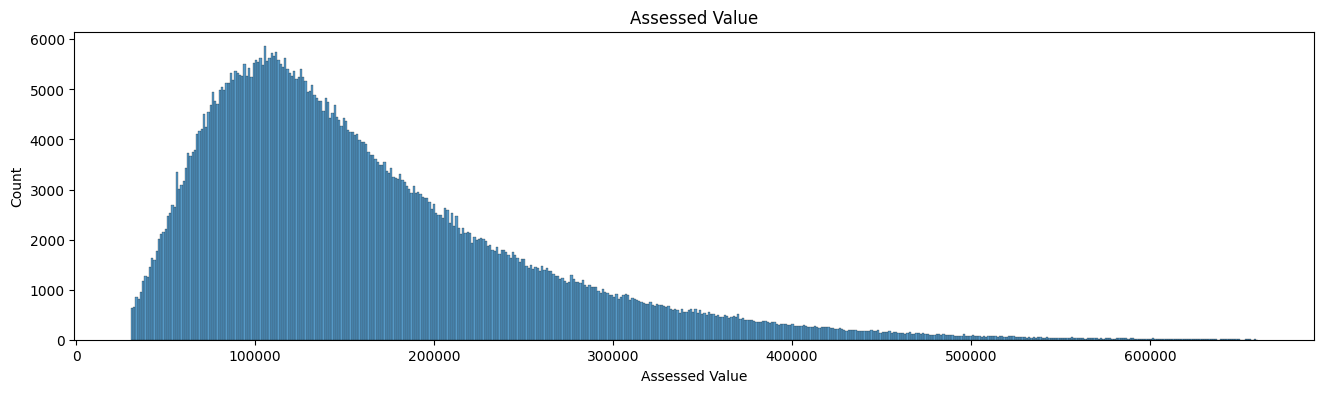

In [22]:
plt.figure(figsize=(16,4))
sns.histplot(data=df, x='Assessed Value', bins=500)
# plt.yscale('log')
# plt.xscale('log')
plt.ylabel('Count')
plt.title('Assessed Value')
plt.show()

In [14]:
print('Assessed value, quantile 0.05', df['Assessed Value'].quantile(.05))
print('Assessed value, quantile 0.95', df['Assessed Value'].quantile(.95))

Assessed value, quantile 0.05 30450.0
Assessed value, quantile 0.95 660590.0


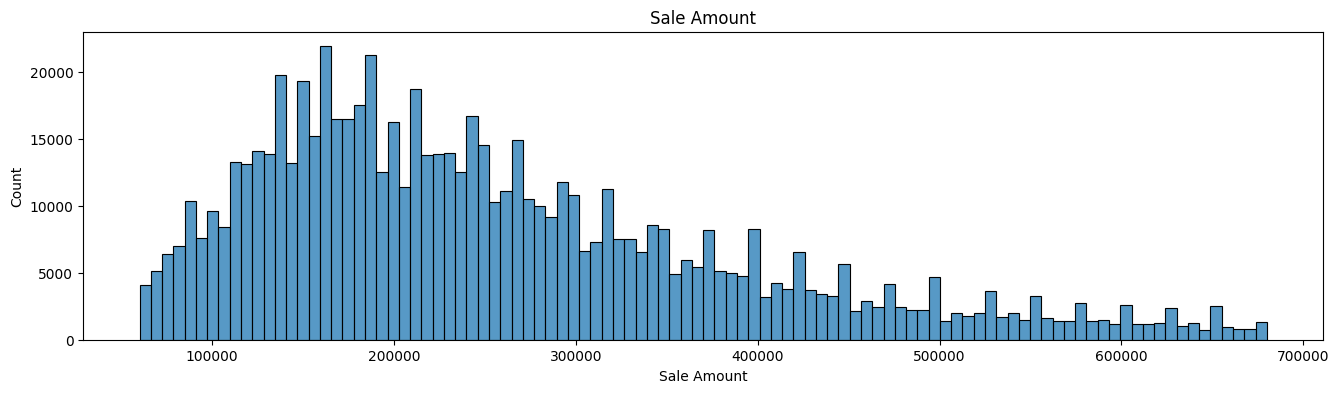

In [23]:
plt.figure(figsize=(16,4))
sns.histplot(data=df, x='Sale Amount', bins=100)
# plt.yscale('log')
plt.ylabel('Count')
plt.title('Sale Amount')
plt.show()

In [16]:
df.loc[df['Sale Amount']>1E7].shape
print('Sale Amount, quantile 0.05', df['Sale Amount'].quantile(.05))
print('Sale Amount, quantile 0.95', df['Sale Amount'].quantile(.95))

Sale Amount, quantile 0.05 44305.40000000005
Sale Amount, quantile 0.95 975000.0


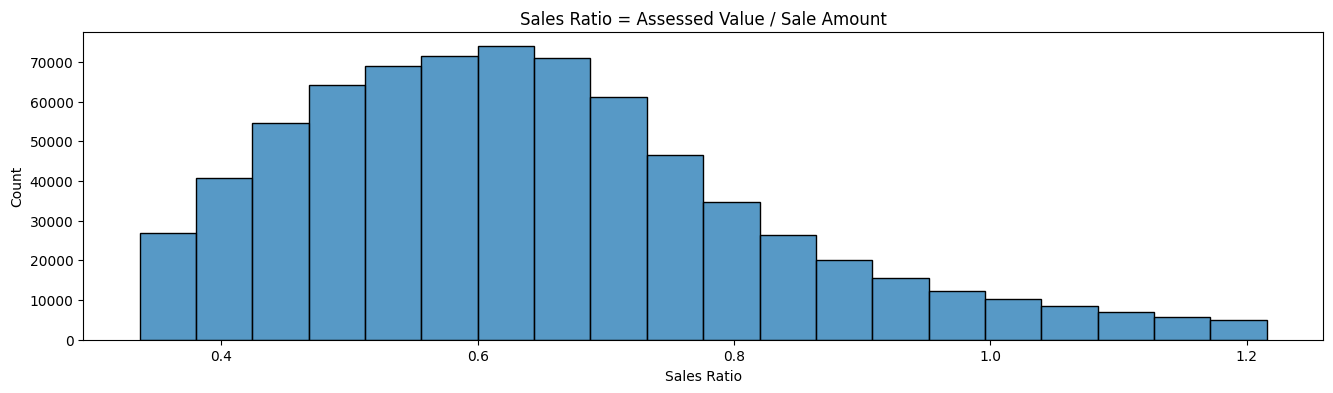

In [24]:
plt.figure(figsize=(16,4))
sns.histplot(data=df, x='Sales Ratio', bins=20)
# plt.yscale('log')
plt.ylabel('Count')
plt.title('Sales Ratio = Assessed Value / Sale Amount')
plt.show()

In [18]:
print('Sales Ratio, quantile 0.05', df['Sales Ratio'].quantile(.05))
print('Sales Ratio, quantile 0.95', df['Sales Ratio'].quantile(.95))

Sales Ratio, quantile 0.05 0.2716
Sales Ratio, quantile 0.95 1.686741677599995


Having informations about outliers we can remove those records from the dataset. On the other hand we also can try to group them with mask function and compare final results.

After that we can run again previous code (plots).

In [15]:
# # Grouping small groups
# df['Assessed Value'] = df['Assessed Value'].mask(df['Assessed Value'] > 1E7, 1E7)
# df['Assessed Value'] = df['Assessed Value'].mask(df['Assessed Value'] < 1E4, 1E4)

# df['Sale Amount'] = df['Sale Amount'].mask(df['Sale Amount'] > 1E7, 1E7)
# df['Sale Amount'] = df['Sale Amount'].mask(df['Sale Amount'] < 1E4, 1E4)

# df['Sales Ratio'] = df['Assessed Value'] / df['Sale Amount']

# Removing outliers
df = df.loc[(df['Assessed Value']>df['Assessed Value'].quantile(.05)) & (df['Assessed Value']<df['Assessed Value'].quantile(.95))]
df = df.loc[(df['Sale Amount']>df['Sale Amount'].quantile(.05)) & (df['Sale Amount']<df['Sale Amount'].quantile(.95))]
df = df.loc[(df['Sales Ratio']>df['Sales Ratio'].quantile(.05)) & (df['Sales Ratio']<df['Sales Ratio'].quantile(.95))]


In [20]:
df.shape

(724799, 14)

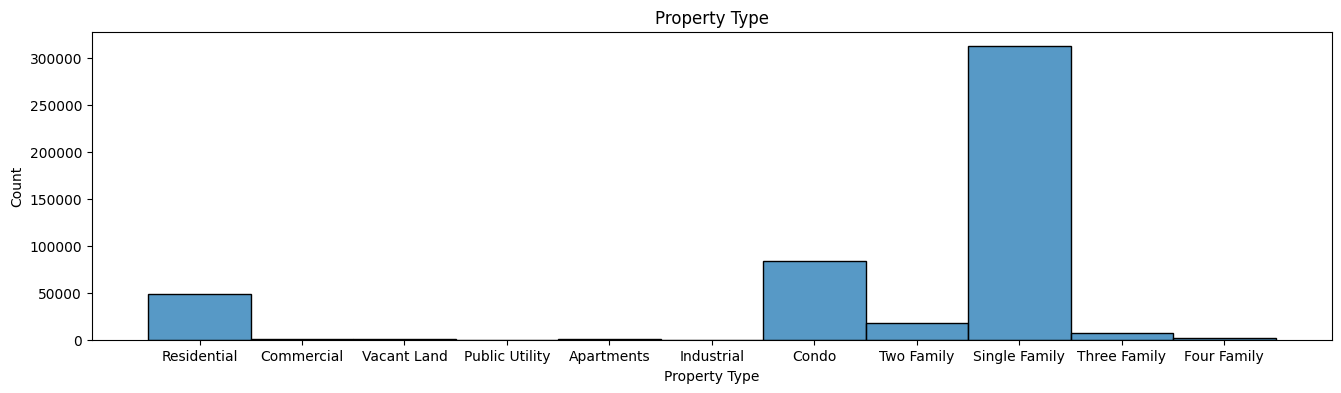

In [25]:
plt.figure(figsize=(16,4))
sns.histplot(data=df, x='Property Type')
plt.ylabel('Count')
plt.title('Property Type')
plt.show()

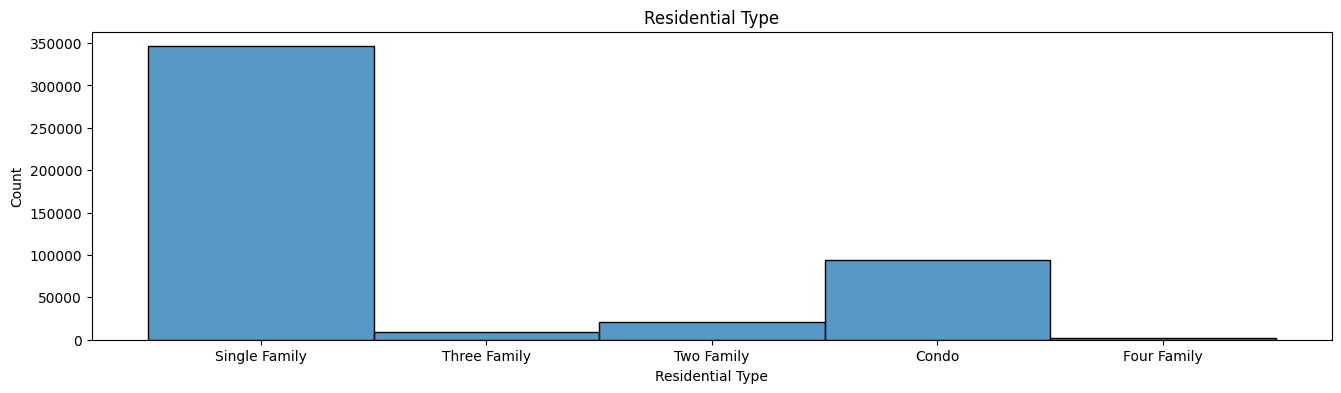

In [26]:
plt.figure(figsize=(16,4))
sns.histplot(data=df, x='Residential Type')
plt.ylabel('Count')
plt.title('Residential Type')
plt.show()

## Looking for NA values & removing/adding columns

In [18]:
column_missing_values = df.isna().sum()
column_missing_values

Serial Number            0
List Year                0
Date Recorded            0
Town                     0
Address                  7
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       251774
Residential Type    254216
Non Use Code        588516
Assessor Remarks    638554
OPM remarks         717983
Location            579088
dtype: int64

[Non Use Code, Assessor Remarks, OPM remarks, Location] Columns mainly have NA values - above 70%. For this reason, they will not taken into account later in the project. Also we will drop rows where [Address] == NA. Dropping few rows won't affect the quality of the final solution. About rows where [Property Type, Residential Type] are NA, will be checked with and without these rows and including/excluding these columns. Moreover we should group residential/property type, because we have mainly 2 types each.

In [16]:
df[['Month Recorded', 'Day Recorded', 'Year Recorded']] = df['Date Recorded'].str.split('/', expand=True)

df['Day Recorded'] = df['Day Recorded'].astype(int)
df['Month Recorded'] = df['Month Recorded'].astype(int)
df['Year Recorded'] = df['Year Recorded'].astype(int)

columns_to_drop = ['Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location', 'Date Recorded']

df_dropped = df.drop(columns=columns_to_drop)
df_dropped = df_dropped.dropna(subset=['Address'])

df_dropped.isna().sum()

Serial Number            0
List Year                0
Town                     0
Address                  0
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       251770
Residential Type    254212
Month Recorded           0
Day Recorded             0
Year Recorded            0
dtype: int64

In [20]:
df_dropped.tail()

,Serial Number,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Month Recorded,Day Recorded,Year Recorded
997205,190161,2019,Newington,22 ROCKLEDGE DR,306000.0,456000.0,0.6711,Single Family,Single Family,3,2,2020
997206,19921,2019,West Haven,75 CLOVER ST,125230.0,246000.0,0.5091,Single Family,Single Family,11,18,2019
997209,190284,2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.8984,Single Family,Single Family,11,27,2019
997210,190129,2019,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.5783,Single Family,Single Family,4,27,2020
997211,190504,2019,Middletown,8 BYSTREK DR,203360.0,280000.0,0.7263,Single Family,Single Family,6,3,2020


In [17]:
df_dropped.loc[(df_dropped['Property Type'].isna()) & (df_dropped['Residential Type'].isna())].shape

print('Property type: ', df_dropped['Property Type'].unique())

print('Residential type: ', df_dropped['Residential Type'].unique())

df_dropped['Residential Type'].isna().sum()/len(df_dropped)

Property type:  ['Residential' 'Commercial' 'Vacant Land' 'Public Utility' 'Apartments'
 nan 'Industrial' 'Condo' 'Two Family' 'Single Family' 'Three Family'
 'Four Family']
Residential type:  ['Single Family' 'Three Family' nan 'Two Family' 'Condo' 'Four Family']


0.35073786686387265

Still need to group property/residential type and handle nulls -> residential type (35.1%) and property type (34.7%). It's too much to remove. In that case we can change nulls to 'unknown' or think about advanced technique to fill missing values (e.g based on town, cost and propability of that type in this city or global)

In [18]:
df_dropped['Property Type'] = np.where((df_dropped['Property Type'].notna()) & (df_dropped['Property Type'] != 'Single Family'), 'Other', df_dropped['Property Type'])
df_dropped['Residential Type'] = np.where((df_dropped['Residential Type'].notna()) & (df_dropped['Residential Type'] != 'Single Family'), 'Other', df_dropped['Residential Type'])

In [19]:
df_dropped['Residential Type'].fillna('Unknown', inplace=True)
df_dropped['Property Type'].fillna('Unknown', inplace=True)

/tmp/ipykernel_4465/1195654747.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dropped['Residential Type'].fillna('Unknown', inplace=True)
/tmp/ipykernel_4465/1195654747.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [24]:
df_dropped.isna().sum()

Serial Number       0
List Year           0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Month Recorded      0
Day Recorded        0
Year Recorded       0
dtype: int64

In [25]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724792 entries, 0 to 997211
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     724792 non-null  int64  
 1   List Year         724792 non-null  int64  
 2   Town              724792 non-null  object 
 3   Address           724792 non-null  object 
 4   Assessed Value    724792 non-null  float64
 5   Sale Amount       724792 non-null  float64
 6   Sales Ratio       724792 non-null  float64
 7   Property Type     724792 non-null  object 
 8   Residential Type  724792 non-null  object 
 9   Month Recorded    724792 non-null  int64  
 10  Day Recorded      724792 non-null  int64  
 11  Year Recorded     724792 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 71.9+ MB


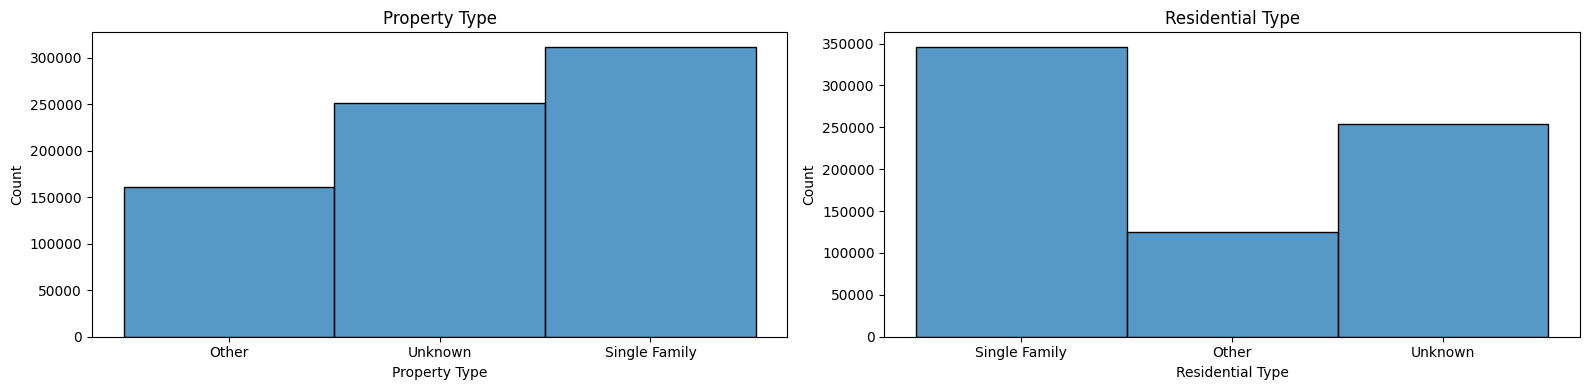

In [35]:
# Create property and residential type after changes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

sns.histplot(data=df_dropped, x='Property Type', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Property Type')

sns.histplot(data=df_dropped, x='Residential Type', ax=ax2)
ax2.set_ylabel('Count')
ax2.set_title('Residential Type')

plt.tight_layout()
plt.show()

Last step related to df modification is handling towns. During coding categorical variables we will need to choose proper encoder, lets focus on 2 the most usefull in this case:
- Oridnal/Label Encoder - assign numbers arbitrarily to the categories. We will have 1 encoded column with values 0,1,2...169, however this can lead to issue with multicollinearity/ model might assume false relationships
- One Hot Encoder - converts each unique category value into a new binary column. Unfortunately that means we will have 170 new colums (high dimensionality) so we will need a lot of memory

In that case we should group cities into counties - our data is from Connecticut state, with 8 new columns we can try using One Hot Encoder. We can use LLM or write manually dictionary that will group cities.

In [20]:
# Dictionary made by ChatGPT, based on df['Towns'].unique()
counties_cities = {
    'Fairfield': ['Ansonia', 'Bethel', 'Bridgeport', 'Brookfield', 'Danbury', 'Darien', 'Derby', 'Easton', 'Fairfield', 'Greenwich', 'Monroe', 'New Canaan', 'New Fairfield', 'Newtown', 'Norwalk', 'Orange', 'Redding', 'Ridgefield', 'Shelton', 'Sherman', 'Stamford', 'Stratford', 'Trumbull', 'Weston', 'Westport', 'Wilton'],
    'Hartford': ['Avon', 'Berlin', 'Bloomfield', 'Bristol', 'Burlington', 'Canton', 'East Granby', 'East Hartford', 'East Windsor', 'Enfield', 'Farmington', 'Glastonbury', 'Granby', 'Hartford', 'Hartland', 'Manchester', 'Marlborough', 'Newington', 'Plainville', 'Rocky Hill', 'Simsbury', 'South Windsor', 'Southington', 'Suffield', 'West Hartford', 'Wethersfield', 'Windsor', 'Windsor Locks'],
    'Litchfield': ['Barkhamsted', 'Bethlehem', 'Bridgewater', 'Canaan', 'Colebrook', 'Cornwall', 'Goshen', 'Harwinton', 'Kent', 'Litchfield', 'Morris', 'New Hartford', 'New Milford', 'Norfolk', 'North Canaan', 'Plymouth', 'Roxbury', 'Salisbury', 'Sharon', 'Thomaston', 'Torrington', 'Warren', 'Washington', 'Watertown', 'Winchester', 'Woodbury'],
    'Middlesex': ['Chester', 'Clinton', 'Cromwell', 'Deep River', 'Durham', 'East Haddam', 'East Hampton', 'Essex', 'Haddam', 'Killingworth', 'Middlefield', 'Middletown', 'Old Saybrook', 'Portland', 'Westbrook'],
    'New Haven': ['Beacon Falls', 'Bethany', 'Branford', 'Cheshire', 'East Haven', 'Guilford', 'Hamden', 'Madison', 'Meriden', 'Middlebury', 'Milford', 'Naugatuck', 'New Haven', 'North Branford', 'North Haven', 'Orange', 'Prospect', 'Seymour', 'Southbury', 'Wallingford', 'Waterbury', 'West Haven', 'Wolcott', 'Woodbridge', 'Woodbury'],
    'New London': ['Bozrah', 'Colchester', 'East Lyme', 'Franklin', 'Griswold', 'Groton', 'Lebanon', 'Ledyard', 'Lisbon', 'Lyme', 'Montville', 'New London', 'North Stonington', 'Norwich', 'Old Lyme', 'Preston', 'Salem', 'Sprague', 'Stonington', 'Voluntown', 'Waterford'],
    'Tolland': ['Andover', 'Bolton', 'Columbia', 'Coventry', 'Ellington', 'Hebron', 'Mansfield', 'Somers', 'Stafford', 'Tolland', 'Union', 'Vernon', 'Willington'],
    'Windham': ['Ashford', 'Brooklyn', 'Canterbury', 'Chaplin', 'Eastford', 'Hampton', 'Killingly', 'Plainfield', 'Pomfret', 'Putnam', 'Scotland', 'Sterling', 'Thompson', 'Windham', 'Woodstock']
}

def assign_county(town):
    for county, cities in counties_cities.items():
        if town in cities:
            return county
    return 'Unknown'

df_dropped['Counties'] = df_dropped['Town'].apply(assign_county)

df_dropped.head()

,Serial Number,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Month Recorded,Day Recorded,Year Recorded,Counties
0,2020177,2020,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Other,Single Family,4,14,2021,Fairfield
1,2020225,2020,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Other,Other,5,26,2021,Fairfield
2,2020348,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Other,Unknown,9,13,2021,Fairfield
3,2020090,2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Other,Other,12,14,2020,Fairfield
4,200500,2020,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Other,Single Family,9,7,2021,Hartford


In [21]:
print(df_dropped['Counties'].loc[df_dropped['Counties'] == 'Unknown'].count())
print(len(df_dropped['Counties']))

15420
724792


## Saving progress
We made quite a lot till now. We should save current dataframe. In this point we can also improve our project a little bit. CSV format doesn't save information about colum sizes, so while reading table we will have int64, float64... File size and df speed would be too low. We have few options: save as pickle, parquet or feather - choose based on speed/size we want. Speed (best) pickle>feather>parquet. Memory usage (best) parquet>feather>pickle.

In [22]:
def optimize_dataframe(df):
    for col in df.columns:
        col_type = df[col].dtype

        if pd.api.types.is_integer_dtype(col_type):
            max_val = df[col].max()
            if max_val <= np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif max_val <= np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif max_val <= np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            else:
                df[col] = df[col].astype(np.int64)
        elif pd.api.types.is_float_dtype(col_type):
            df[col] = df[col].astype(np.float32)
        elif pd.api.types.is_object_dtype(col_type):
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < 0.5:
                df[col] = df[col].astype('category')
    
    return df

df_dropped_copy = df_dropped.copy(deep=True)
df_cleared = optimize_dataframe(df_dropped_copy)

df_cleared.to_pickle(r'../data/input/data_clear.pkl')

In [23]:
df_pickle = pd.read_pickle(r'../data/input/data_clear.pkl')

In [24]:
df_pickle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724792 entries, 0 to 997211
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Serial Number     724792 non-null  int32   
 1   List Year         724792 non-null  int16   
 2   Town              724792 non-null  category
 3   Address           724792 non-null  object  
 4   Assessed Value    724792 non-null  float32 
 5   Sale Amount       724792 non-null  float32 
 6   Sales Ratio       724792 non-null  float32 
 7   Property Type     724792 non-null  category
 8   Residential Type  724792 non-null  category
 9   Month Recorded    724792 non-null  int8    
 10  Day Recorded      724792 non-null  int8    
 11  Year Recorded     724792 non-null  int16   
 12  Counties          724792 non-null  category
dtypes: category(4), float32(3), int16(2), int32(1), int8(2), object(1)
memory usage: 29.7+ MB


## Coding categorical variables

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from scipy.stats import randint, uniform
import joblib
import lightgbm as lgb
import optuna

In [26]:
df_train = df_pickle.drop(['Serial Number', 'List Year', 'Address', 'Sales Ratio'], axis=1)
df_train.head()

,Town,Assessed Value,Sale Amount,Property Type,Residential Type,Month Recorded,Day Recorded,Year Recorded,Counties
0,Ansonia,133000.0,248400.0,Other,Single Family,4,14,2021,Fairfield
1,Ansonia,110500.0,239900.0,Other,Other,5,26,2021,Fairfield
2,Ansonia,150500.0,325000.0,Other,Unknown,9,13,2021,Fairfield
3,Ansonia,127400.0,202500.0,Other,Other,12,14,2020,Fairfield
4,Avon,217640.0,400000.0,Other,Single Family,9,7,2021,Hartford


In [27]:
X = df_train.drop(['Town', 'Sale Amount'], axis=1)
y = df_train['Sale Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [28]:
# In categorical features we must remember about 'Town'
numeric_features = ['Assessed Value', 'Month Recorded', 'Day Recorded', 'Year Recorded']
categorical_features = ['Property Type', 'Residential Type', 'Counties']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Linear Regression

In [29]:
results = []

# Definicja pipeline
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Definicja siatki parametrów do strojenia
param_dist_lr = {
    'regressor__fit_intercept': [True, False]
}

In [30]:
random_search_lr = RandomizedSearchCV(pipeline_lr, param_distributions=param_dist_lr, n_iter=20, cv=5, verbose=1, n_jobs=-1)
random_search_lr.fit(X_train, y_train)

# Wyniki strojenia
print("Best parameters found for LinearRegression:")
print(random_search_lr.best_params_)
print("Best score found for LinearRegression: {:.4f}".format(random_search_lr.best_score_))

# Predykcja na zbiorze testowym i ocena
y_pred_lr = random_search_lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
results = {
    'Model': 'LinearRegression',
    'Params': random_search_lr.best_params_,
    'Best Score': random_search_lr.best_score_,
    'Mean Squared Error': mse,
    'R2 Score': r2
}

print("\nLinear Regression - Evaluation:")
print(f"Test Mean Squared Error: {mse:.4f}")
print(f"Test R2 Score: {r2:.4f}")

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found for LinearRegression:
{'regressor__fit_intercept': True}
Best score found for LinearRegression: 0.7946

Linear Regression - Evaluation:
Test Mean Squared Error: 3650011961.8771
Test R2 Score: 0.7917


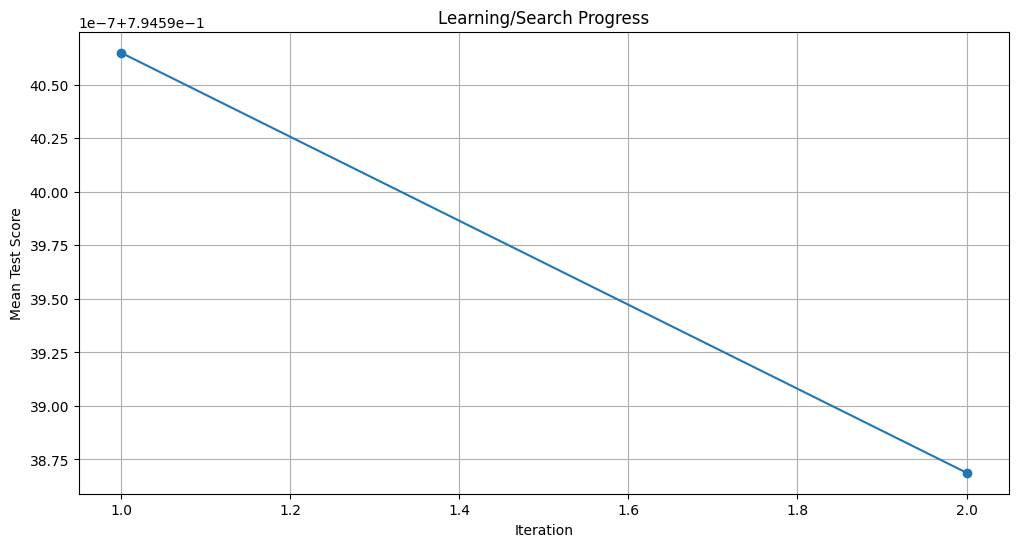

In [16]:
cv_results = random_search_lr.cv_results_
mean_test_scores = cv_results['mean_test_score']
param_values = np.arange(1, len(mean_test_scores) + 1)

plt.figure(figsize=(12, 6))
plt.plot(param_values, mean_test_scores, marker='o')
plt.title('Learning/Search Progress')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.show()

In [31]:
with open(r'../data/output/results.txt', 'a') as f:
    f.write(f"Model: {results['Model']}\n")
    f.write(f"Params: {results['Params']}\n")
    f.write(f"Best Score: {results['Best Score']:.4f}\n")
    f.write(f"Mean Squared Error: {results['Mean Squared Error']:.4f}\n")
    f.write(f"R2 Score: {results['R2 Score']:.4f}\n\n")

print("Results saved to results.txt")

Results saved to results.txt


### Lasso Regresion

In [32]:
results = []

pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(random_state=42))
])

param_dist_lasso = {
    'regressor__alpha': uniform(0.01, 10.0),
    'regressor__fit_intercept': [True, False],
    'regressor__max_iter': randint(50,1000)
}

In [33]:
random_search_lasso = RandomizedSearchCV(pipeline_lasso, param_distributions=param_dist_lasso, n_iter=20, cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search_lasso.fit(X_train, y_train)

print("Best parameters found for Lasso:")
print(random_search_lasso.best_params_)
print("Best score found for Lasso: {:.4f}".format(random_search_lasso.best_score_))

# Predykcja na zbiorze testowym i ocena
y_pred_lasso = random_search_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)
results.append({
    'Model': 'Lasso',
    'Params': random_search_lasso.best_params_,
    'Best Score': random_search_lasso.best_score_,
    'Mean Squared Error': mse,
    'R2 Score': r2
})

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.981e+14, tolerance: 7.137e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.892e+14, tolerance: 7.146e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.035e+14, tolerance: 7.138e

Best parameters found for Lasso:
{'regressor__alpha': 0.16966252220214195, 'regressor__fit_intercept': False, 'regressor__max_iter': 389}
Best score found for Lasso: 0.7946


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.944e+14, tolerance: 4.275e+12
  model = cd_fast.enet_coordinate_descent(


In [35]:
with open(r'../data/output/results.txt', 'a') as f:
    for result in results:
        f.write(f"Model: {result['Model']}\n")
        f.write(f"Params: {result['Params']}\n")
        f.write(f"Best Score: {result['Best Score']:.4f}\n")
        f.write(f"Mean Squared Error: {result['Mean Squared Error']:.4f}\n")
        f.write(f"R2 Score: {result['R2 Score']:.4f}\n\n")

print("Results saved to results.txt")

Results saved to results.txt


### Ridge Regression

In [36]:
results = []

pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(random_state=42))
])

# Siatka parametrów do strojenia
param_dist_ridge = {
    'regressor__alpha': uniform(0.01, 10.0),  # Losowy zakres wartości dla parametru alpha
    'regressor__fit_intercept': [True, False],
    'regressor__solver': ['svd', 'lsqr', 'sparse_cg', 'lbfsg', 'sag', 'saga']
}

In [37]:
random_search_ridge = RandomizedSearchCV(pipeline_ridge, param_distributions=param_dist_ridge, n_iter=20, cv=5, verbose=1, n_jobs=-1, random_state=42)
random_search_ridge.fit(X_train, y_train)

print("Best parameters found for Ridge:")
print(random_search_ridge.best_params_)
print("Best score found for Ridge: {:.4f}".format(random_search_ridge.best_score_))

# Predykcja na zbiorze testowym i ocena
y_pred_ridge = random_search_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)
results.append({
    'Model': 'Ridge',
    'Params': random_search_ridge.best_params_,
    'Best Score': random_search_ridge.best_score_,
    'Mean Squared Error': mse,
    'R2 Score': r2
})

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 476, in fit
    self._final_estimator.fit(Xt, y, **la

Best parameters found for Ridge:
{'regressor__alpha': 0.4766566321361543, 'regressor__fit_intercept': False, 'regressor__solver': 'saga'}
Best score found for Ridge: 0.7946


In [39]:
with open(r'../data/output/results.txt', 'a') as f:
    for result in results:
        f.write(f"Model: {result['Model']}\n")
        f.write(f"Params: {result['Params']}\n")
        f.write(f"Best Score: {result['Best Score']:.4f}\n")
        f.write(f"Mean Squared Error: {result['Mean Squared Error']:.4f}\n")
        f.write(f"R2 Score: {result['R2 Score']:.4f}\n\n")

print("Results saved to results.txt")

Results saved to results.txt


### Random Forest Regression

We can start with GridSearch, do every iteration. This dataset isn't especially big, on my CPU 1 iteration take nearly 40 seconds (didn't incude town during mesurements). So we can try doing this with couple of estimators, features and depth, but calculating every combination will take too much time. We can solve this with 3 diffrent approaches:
- use another libraries e.g RAPIDS cuML. This provides ability to train with GPU, this can shorten the time by a dozen or even several dozen times
- use RandomizedSearch - instead of doing every iteration we do n iterations with random chosen parameters. Results like these can help quickly narrow down search to best ranges
- use parallel_backend from joblib for parallel processing

I'll use 2nd method and write 3rd.

In [40]:
results = []

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_dist_rf = {
    'regressor__n_estimators': randint(50, 300),
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__max_depth': randint(1, 10)
}

In [41]:
# Second method
random_search_rf = RandomizedSearchCV(pipeline_rf, param_distributions=param_dist_rf, n_iter=20, cv=5, verbose=1, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

print("Best parameters found for RandomForestRegressor:")
print(random_search_rf.best_params_)
print("Best score found for RandomForestRegressor: {:.4f}".format(random_search_rf.best_score_))

y_pred_rf = random_search_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
results.append({
    'Model': 'RandomForestRegressor',
    'Params': random_search_rf.best_params_,
    'Best Score': random_search_rf.best_score_,
    'Mean Squared Error': mse,
    'R2 Score': r2
})

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 476, in fit
    self._final_estimator.fit(Xt, y, **l

Best parameters found for RandomForestRegressor:
{'regressor__max_depth': 9, 'regressor__max_features': 'sqrt', 'regressor__n_estimators': 94}
Best score found for RandomForestRegressor: 0.8072


In [44]:
# Saving results in txt file
with open(r'../data/output/results.txt', 'a') as f:
    for result in results:
        f.write(f"Model: {result['Model']}\n")
        f.write(f"Params: {result['Params']}\n")
        f.write(f"Best Score: {result['Best Score']:.4f}\n")
        f.write(f"Mean Squared Error: {result['Mean Squared Error']:.4f}\n")
        f.write(f"R2 Score: {result['R2 Score']:.4f}\n\n")

In [64]:
joblib.dump(random_search_rf, r'../data/output/models/random_forest_model.pkl')

['../data/output/models/random_forest_model.pkl']

### LightGBM

In [45]:
results = []

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 50),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0)
    }

    model = lgb.LGBMRegressor(**params, random_state=42)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

print("Best parameters found for LightGBM:")
print(study.best_params)

best_params = study.best_params
best_model = lgb.LGBMRegressor(**best_params, random_state=42)

pipeline_best = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_model)
])

pipeline_best.fit(X_train, y_train)
y_pred_best = pipeline_best.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

results = [{
    'Model': 'LightGBM',
    'Params': study.best_params,
    'Mean Squared Error': mse_best,
    'R2 Score': r2_best
}]

In [47]:
with open(r'../data/output/results.txt', 'a') as f:
    for result in results:
        f.write(f"Model: {result['Model']}\n")
        f.write(f"Params: {result['Params']}\n")
        f.write(f"Mean Squared Error: {result['Mean Squared Error']:.4f}\n")
        f.write(f"R2 Score: {result['R2 Score']:.4f}\n\n")

print("Results saved to results.txt")

Results saved to results.txt


In [65]:
# Save the model
joblib.dump(pipeline_best, r'../data/output/models/LightGBM_model.pkl')

['../data/output/models/LightGBM_model.pkl']

### Neural Network

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

2024-06-14 17:58:23.790921: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [52]:
# Check if TensorFlow can access the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Print TensorFlow version and cuDNN version if available
print("TensorFlow version:", tf.__version__)

# Check if cuDNN is properly installed
try:
    from tensorflow.python.platform import build_info as tf_build_info
    print("cuDNN version:", tf_build_info.cudnn_version_number)
except Exception as e:
    print("Error checking cuDNN version:", e)

Num GPUs Available:  0
TensorFlow version: 2.16.1
Error checking cuDNN version: module 'tensorflow.python.platform.build_info' has no attribute 'cudnn_version_number'


In [58]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Model definition
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_processed.shape[1],)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(1, activation='linear')  # Use linear activation for regression
])

# Model compilation
learning_rate = 0.0015
batch_size = 128
epochs = 25
model.compile(optimizer=Adam(learning_rate=learning_rate),  # Adam(learning_rate=0.0003)
              loss='mean_squared_error',  # Use mean_squared_error for regression
              metrics=['mean_squared_error'])

# Model training
history = model.fit(X_train_processed, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_processed, y_test), verbose=1)

# Model evaluation
test_loss, test_mse = model.evaluate(X_test_processed, y_test, verbose=1)
print("\nSimple Neural Network - Evaluation:")
print(f'Test MSE: {test_mse:.4f}')

# Prediction
y_pred_nn = model.predict(X_test_processed)

# Compute additional metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Mean Squared Error: {mse_nn:.4f}')
print(f'R2 Score: {r2_nn:.4f}')

# Save results to a file with additional parameters
results = [{
    'Model': 'Simple Neural Network',
    'Mean Squared Error': mse_nn,
    'R2 Score': r2_nn,
    'Model Architecture': [
        {'layer_type': 'Dense', 'units': 64, 'activation': 'relu'},
        {'layer_type': 'BatchNormalization'},
        {'layer_type': 'Dropout', 'rate': 0.1},
        {'layer_type': 'Dense', 'units': 16, 'activation': 'relu'},
        {'layer_type': 'BatchNormalization'},
        {'layer_type': 'Dropout', 'rate': 0.1},
        {'layer_type': 'Dense', 'units': 1, 'activation': 'linear'}
    ],
    'Optimizer': 'Adam',
    'Learning Rate': learning_rate,
    'Batch Size': batch_size,
    'Epochs': epochs
}]


Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3964/3964 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 84382572544.0000 - mean_squared_error: 84382572544.0000 - val_loss: 83280191488.0000 - val_mean_squared_error: 83280543744.0000
Epoch 2/25
3964/3964 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 82999836672.0000 - mean_squared_error: 82999836672.0000 - val_loss: 81308000256.0000 - val_mean_squared_error: 81308319744.0000
Epoch 3/25
3964/3964 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 81066508288.0000 - mean_squared_error: 81066508288.0000 - val_loss: 78493777920.0000 - val_mean_squared_error: 78494048256.0000
Epoch 4/25
3964/3964 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 77771055104.0000 - mean_squared_error: 77771055104.0000 - val_loss: 74836058112.0000 - val_mean_squared_error: 74836271104.0000
Epoch 5/25
3964/3964 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 74011795456.0000 - mean_squared_error: 74011795456.0000 - val_loss: 70663651328.0000 - val_mean_squared_error: 70663806976.0000
Epoch 6/25
3964/3964 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step -

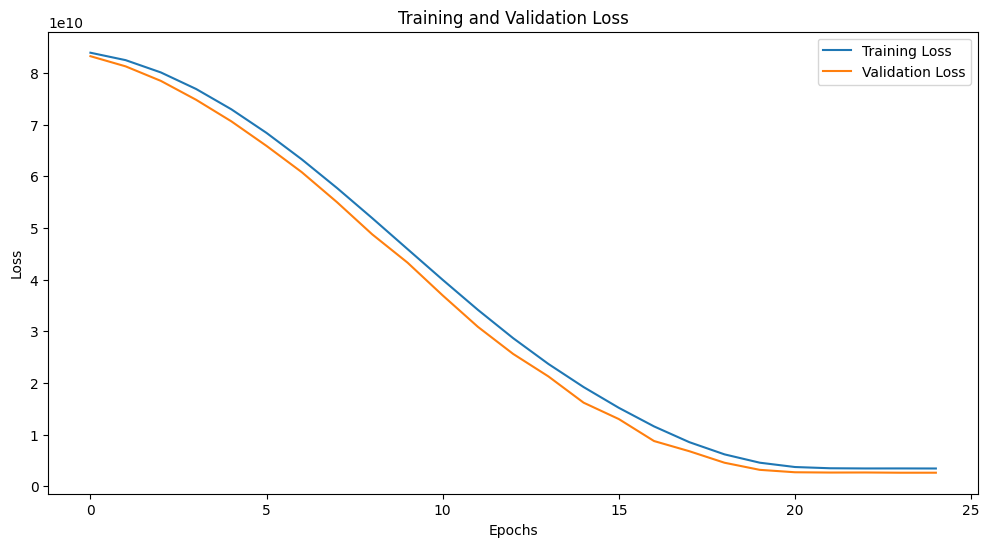

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [60]:
with open('../data/output/results.txt', 'a') as f:
    for result in results:
        f.write(f"Model: {result['Model']}\n")
        f.write(f"Mean Squared Error: {result['Mean Squared Error']:.4f}\n")
        f.write(f"R2 Score: {result['R2 Score']:.4f}\n")
        f.write(f"Model Architecture: {result['Model Architecture']}\n")
        f.write(f"Optimizer: {result['Optimizer']}\n")
        f.write(f"Learning Rate: {result['Learning Rate']}\n")
        f.write(f"Batch Size: {result['Batch Size']}\n")
        f.write(f"Epochs: {result['Epochs']}\n")
        f.write("\n")

print("Results appended to results.txt")

Results appended to results.txt


In [61]:

# Save the model
model.save(r'../data/output/models/nn_model.h5')
print("Model saved as 'simple_nn_model.h5'")


Model saved as 'simple_nn_model.h5'
